## Final Project Submission

Please fill out:
* Student name: Samira Ally 
* Student pace: self paced / part time / full time- Part-time
* Scheduled project review date/time:9th February 2023 
* Instructor name: Roselyn Mburu
* Blog post URL:https://samiraally.wordpress.com/2023/02/07/moringa-data-science/


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [35]:
import pandas as pd
ratings_df = pd.read_csv('title.ratings.csv' , index_col=0)
gross_df = pd.read_csv('bom.movie_gross.csv', index_col=0)
basics_df = pd.read_csv('title.basics.csv', index_col=0)
# Join the title.ratings.csv and title.basics.csv datasets on the "tconst" column
ratings_basics_df = pd.merge(ratings_df, basics_df, on='tconst')
# Join the resulting dataset with the bom.movie_gross.csv dataset on the "title" column
df = pd.merge(ratings_basics_df, gross_df, left_on='primary_title', right_on='title')
df.head()

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
2,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000,2014
3,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
4,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010


In [38]:
# Print the shape of the DataFrame
print(df.shape)

(3027, 11)


In [39]:
# Print the column names
print(df.columns)

Index(['averagerating', 'numvotes', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'studio', 'domestic_gross',
       'foreign_gross', 'year'],
      dtype='object')


In [41]:
# Print the first 5 rows of the DataFrame
(df.head())

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
2,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000,2014
3,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
4,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    3027 non-null   float64
 1   numvotes         3027 non-null   int64  
 2   primary_title    3027 non-null   object 
 3   original_title   3027 non-null   object 
 4   start_year       3027 non-null   int64  
 5   runtime_minutes  2980 non-null   float64
 6   genres           3020 non-null   object 
 7   studio           3024 non-null   object 
 8   domestic_gross   3005 non-null   float64
 9   foreign_gross    1832 non-null   object 
 10  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 283.8+ KB


In [44]:
# Print the number of missing values in each column
(df.isnull().sum())

averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [45]:
# Drop the rows with missing values
df = df.dropna()

In [46]:
(df.isnull().sum())

averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

in the above the cells i was checking whether there were any missing values. some were present in the title ratings but it would not be wise to fill in with known values as it may distort the data. 

In [48]:

# Usefule addition:
df.duplicated().sum() #counts duplicated data

0

Outliers are extreme data points that vary immensely from the other points. They are the hardest to detect using ones eye among other data inaccuracies within the data in the sense that they are often of the same type as the other observations. Therefore, it is important to understand that just because they exist, doesn’t mean they are incorrect and as such, there should be a valid reason to remove these data points.

<AxesSubplot:>

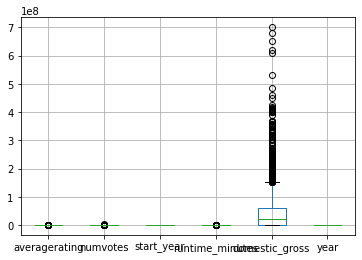

In [54]:
# we can also use a box plot to identify outliers
df_columns = ['averagerating', 'numvotes', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'studio', 'domestic_gross',
       'foreign_gross', 'year'],
      
df.boxplot()

In [76]:
# Calculate the first quartile (Q1), the third quartile (Q3), and the IQR
Q1 = df['averagerating'].quantile(0.25)
Q3 = df['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
df = df[~((df['averagerating'] < (Q1 - 1.5 * IQR)) | (df['domestic_gross'] > (Q3 + 1.5 * IQR)))]

(df)

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
3,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
4,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010
7,5.4,54646,Aloha,Aloha,2015,105.0,"Comedy,Drama,Romance",Sony,21100000.0,5200000,2015
...,...,...,...,...,...,...,...,...,...,...,...
3010,7.4,54,The Past,The Past,2018,120.0,"Drama,Horror",SPC,1300000.0,9300000,2013
3014,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",SGem,26800000.0,285400000,2017
3015,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",WB (NL),69200000.0,48500000,2018
3021,5.8,5841,Finding Fanny,Finding Fanny,2014,102.0,"Adventure,Comedy,Drama",FIP,616000.0,7100000,2014


<AxesSubplot:>

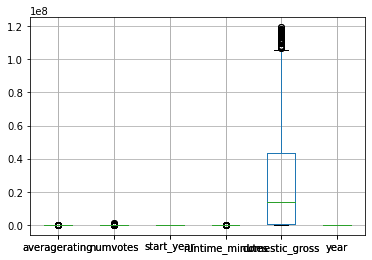

In [85]:
df.boxplot(column=['averagerating', 'numvotes','start_year', 'runtime_minutes','domestic_gross','year'])
df.boxplot()

In [86]:
df.head()

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
3,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
4,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010
7,5.4,54646,Aloha,Aloha,2015,105.0,"Comedy,Drama,Romance",Sony,21100000.0,5200000,2015


In [87]:
df.tail()

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3010,7.4,54,The Past,The Past,2018,120.0,"Drama,Horror",SPC,1300000.0,9300000,2013
3014,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",SGem,26800000.0,285400000,2017
3015,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",WB (NL),69200000.0,48500000,2018
3021,5.8,5841,Finding Fanny,Finding Fanny,2014,102.0,"Adventure,Comedy,Drama",FIP,616000.0,7100000,2014
3025,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000,2018


In [88]:
df.describe()

,averagerating,numvotes,start_year,runtime_minutes,domestic_gross,year
count,1559.000000,1.559000e+03,1559.000000,1559.000000,1.559000e+03,1559.000000
mean,6.394548,6.581617e+04,2013.491341,106.796665,2.636432e+07,2013.595895
std,0.973996,9.515661e+04,2.628670,19.547128,3.066780e+07,2.577852
min,1.600000,5.000000e+00,2010.000000,3.000000,4.000000e+02,2010.000000
25%,5.900000,5.254000e+03,2011.000000,94.000000,7.775000e+05,2011.000000
50%,6.500000,3.095100e+04,2013.000000,105.000000,1.380000e+07,2013.000000
75%,7.100000,8.768650e+04,2016.000000,117.000000,4.315000e+07,2016.000000
max,9.200000,1.035358e+06,2019.000000,272.000000,1.192000e+08,2018.000000


array([[<AxesSubplot:title={'center':'averagerating'}>,
        <AxesSubplot:title={'center':'numvotes'}>],
       [<AxesSubplot:title={'center':'start_year'}>,
        <AxesSubplot:title={'center':'runtime_minutes'}>],
       [<AxesSubplot:title={'center':'domestic_gross'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

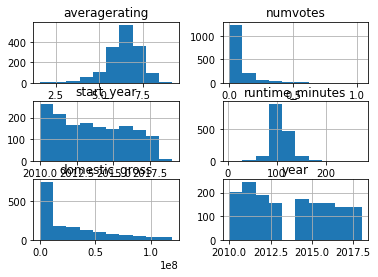

In [89]:
df.hist()

In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 3025
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    1559 non-null   float64
 1   numvotes         1559 non-null   int64  
 2   primary_title    1559 non-null   object 
 3   original_title   1559 non-null   object 
 4   start_year       1559 non-null   int64  
 5   runtime_minutes  1559 non-null   float64
 6   genres           1559 non-null   object 
 7   studio           1559 non-null   object 
 8   domestic_gross   1559 non-null   float64
 9   foreign_gross    1559 non-null   object 
 10  year             1559 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 146.2+ KB


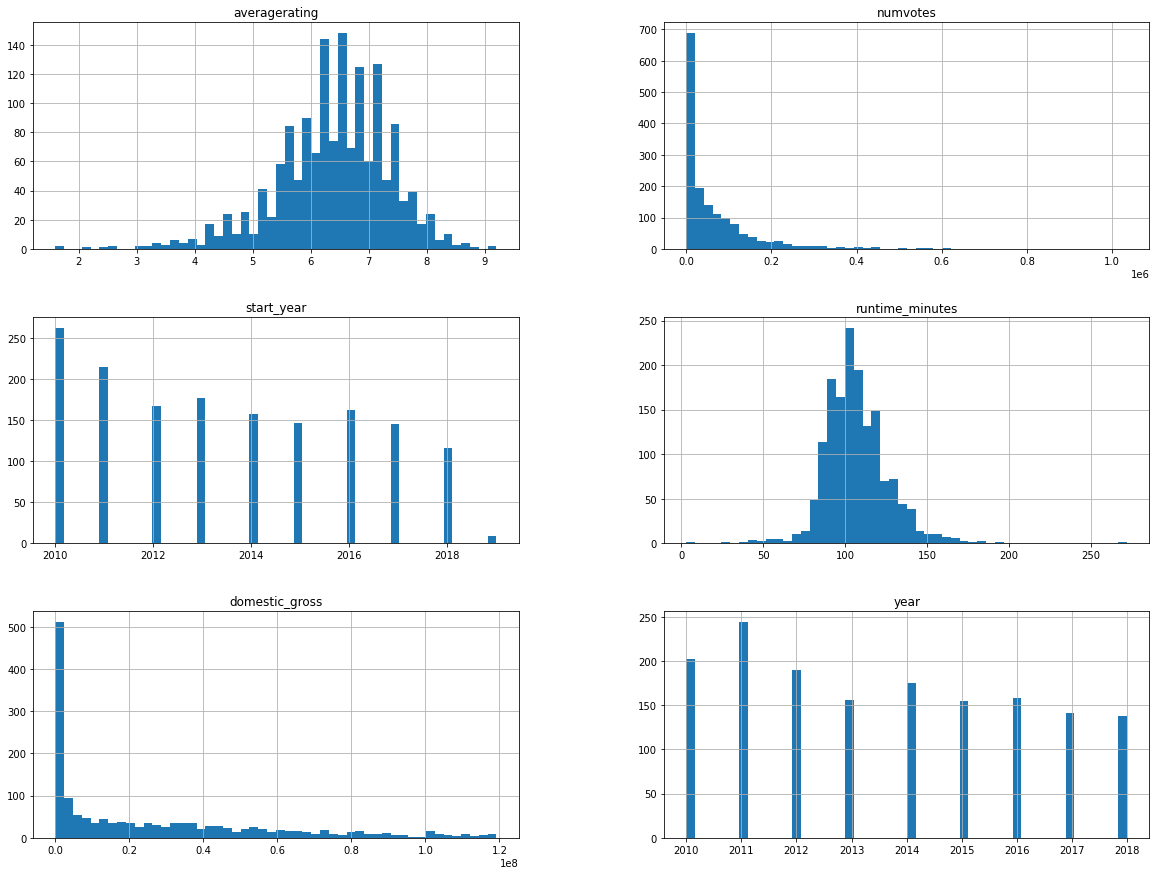

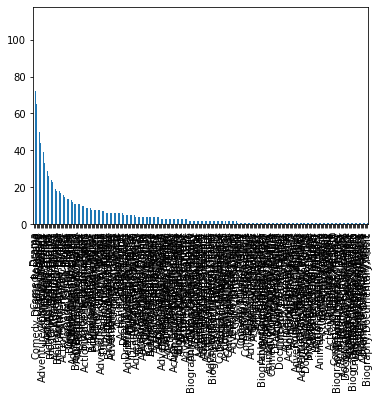

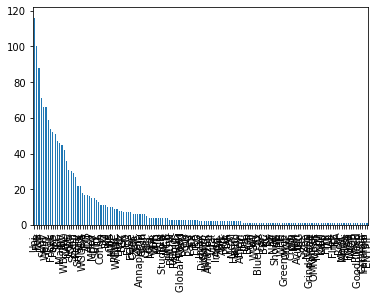

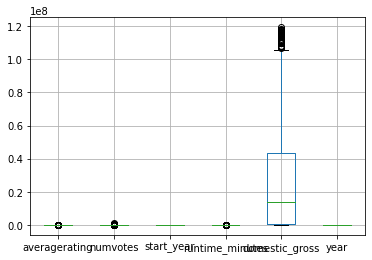

In [98]:

# Plot histograms for numerical variables
df.hist(bins=50, figsize=(20,15))
plt.show()

# Plot bar plots for categorical variables
df['genres'].value_counts().plot(kind='bar')
plt.show()
df['studio'].value_counts().plot(kind='bar')
plt.show()

# Plot box plots for numerical variables
df.boxplot(column=['averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'domestic_gross', 'year'])
plt.show()


/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


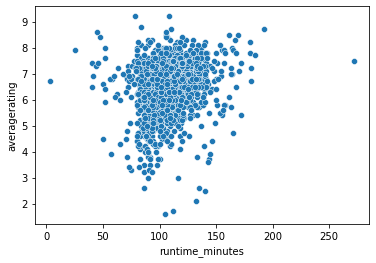

In [101]:
 # Select the columns for x and y variables
x = df["runtime_minutes"]
y = df["averagerating"]

# Create the scatterplot
sns.scatterplot(x, y)

# Show the plot
plt.show()

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


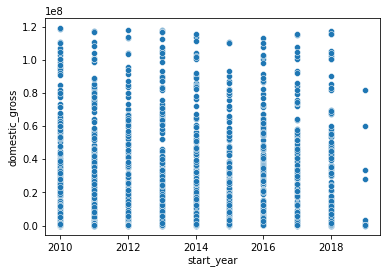

In [102]:
# Select the columns for x and y variables
x = df["start_year"]
y = df["domestic_gross"]

# Create the scatterplot
sns.scatterplot(x, y)

# Show the plot
plt.show()

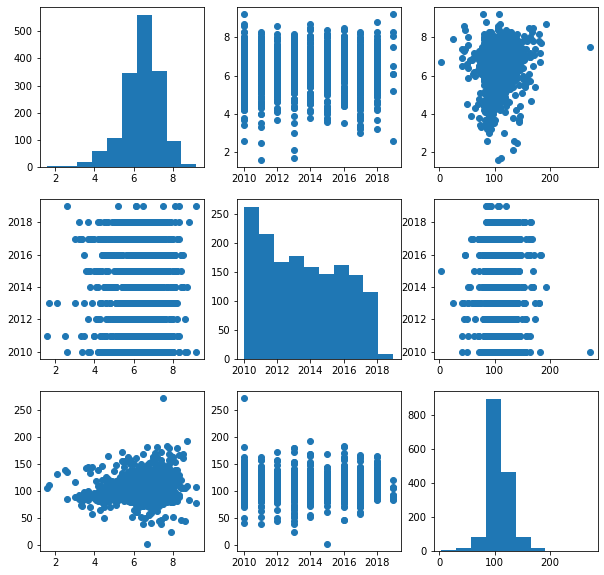

In [103]:
# Select the columns to include in the scatterplot matrix
columns = ["averagerating", "start_year", "runtime_minutes"]

# Convert the selected columns to a numpy array
data = df[columns].values

# Define the number of subplots
n = len(columns)

# Create the subplots
fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(10,10))

# Flatten the axes array
axes = axes.flatten()

# Iterate through the subplots
for i in range(n**2):
    ax = axes[i]
    j = i // n
    k = i % n
    if j == k:
        ax.hist(data[:, j])
    else:
        ax.scatter(data[:, k], data[:, j])

# Show the plot
plt.show()

In [106]:
from scipy import stats

# Calculate summary statistics for numerical columns
num_cols = ['averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'domestic_gross', 'year']
num_summary = df[num_cols].describe()
print(num_summary)

# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()
print(corr_matrix)

# Perform hypothesis testing
# Example: t-test to compare average ratings between two groups
group1 = df[df['studio'] == 'Warner Bros.']['averagerating']
group2 = df[df['studio'] != 'Warner Bros.']['averagerating']
t_statistic, p_value = stats.ttest_ind(group1, group2)
print('t-statistic:', t_statistic)
print('p-value:', p_value)


       averagerating      numvotes   start_year  runtime_minutes  \
count    1559.000000  1.559000e+03  1559.000000      1559.000000   
mean        6.394548  6.581617e+04  2013.491341       106.796665   
std         0.973996  9.515661e+04     2.628670        19.547128   
min         1.600000  5.000000e+00  2010.000000         3.000000   
25%         5.900000  5.254000e+03  2011.000000        94.000000   
50%         6.500000  3.095100e+04  2013.000000       105.000000   
75%         7.100000  8.768650e+04  2016.000000       117.000000   
max         9.200000  1.035358e+06  2019.000000       272.000000   

       domestic_gross         year  
count    1.559000e+03  1559.000000  
mean     2.636432e+07  2013.595895  
std      3.066780e+07     2.577852  
min      4.000000e+02  2010.000000  
25%      7.775000e+05  2011.000000  
50%      1.380000e+07  2013.000000  
75%      4.315000e+07  2016.000000  
max      1.192000e+08  2018.000000  
                 averagerating  numvotes  start_year  

In [107]:
import scipy.stats as stats

# Create subgroups based on a categorical column (e.g. 'studio')
group1 = df[df['studio'] == 'Warner Bros.']['averagerating']
group2 = df[df['studio'] != 'Warner Bros.']['averagerating']

# Perform independent t-test to compare means of two groups
t_statistic, p_value = stats.ttest_ind(group1, group2)
print('t-statistic:', t_statistic)
print('p-value:', p_value)


t-statistic: nan
p-value: nan


The next step in the Exploratory Data Analysis (EDA) process is to draw conclusions and insights from the data. This may include:
Identifying trends and patterns in the data
Validating or invalidating hypotheses
Determining relationships between variables
Identifying outliers or anomalies in the data
Making visualizations to support the findings
It is also important to communicate the results and insights obtained from the EDA to relevant stakeholders, including technical and non-technical audiences.

The above analysis is one on movie ratings with their names. there is also presence of those movies with their 'averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'domestic_gross', 'year'and overall production.the data spans acroos the year 2010 to the year 2018. From the graphs, there is evidence oh high run times at the beggining in 2010 with subsequent highs on all columns in the middle around 2014.when we try to apply statitics to comapre two production stations together warner bros and another, unfortunately we get a nan value because we are really not provided with much data on that. The current stats we are dealing with mainly come from Warner bros dataset only. the averageting sales were at a high of 150 while the movie company had a highest running time of 240 minutes which is the average time for a complete movie.There was good perfromance at the beginning of the year and an investigation needs to be carried out on why there was performance depreciation the years after. The domestic gross was also the highest in 2010 and depreciated significantly in the years after.